In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.feature_selection import *
import seaborn as sns

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [ ]:
y_train = y_train.reshape(y_train.shape[0])
y_train.shape

(50000,)

In [ ]:
y_test = y_test.reshape(y_test.shape[0])
y_test.shape

(10000,)

In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

[1]


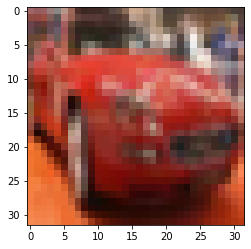

In [ ]:
print(y_train[5])
plt.imshow(x_train[5])


In [ ]:
def show(array):
  for i in array:
    plt.imshow(x_train[i])
    plt.show()
    plt.figure(figsize=(10,10))
    sns.distplot(x_train[i].reshape(3072))
    plt.title("distribution of pixels")
    plt.show()

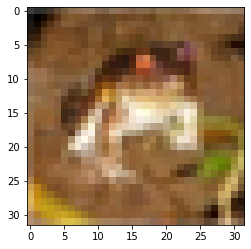

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


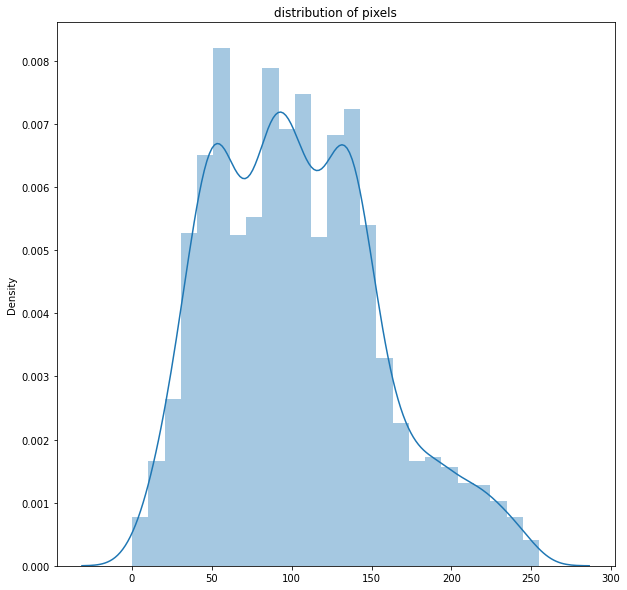

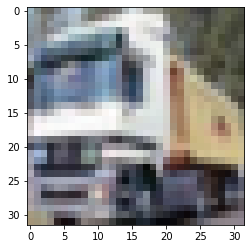

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


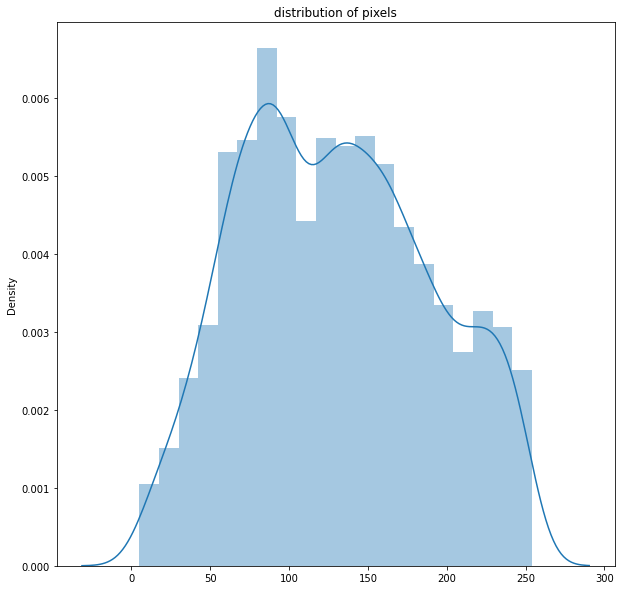

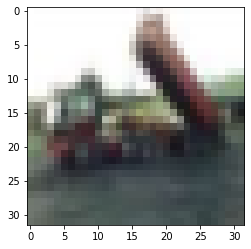

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


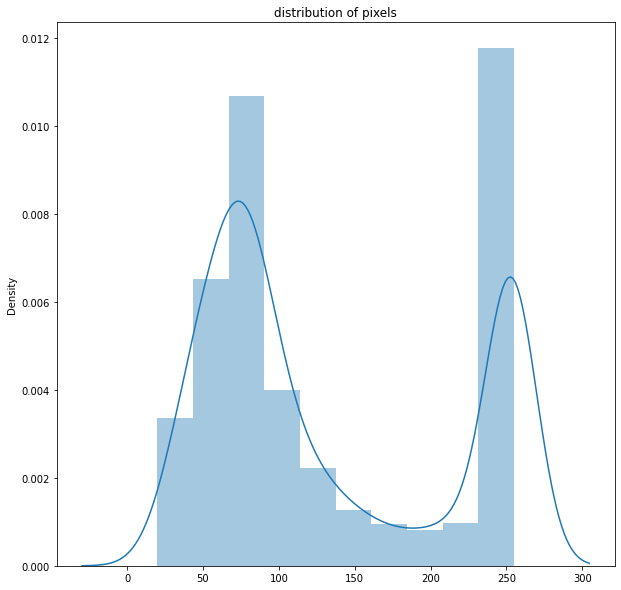

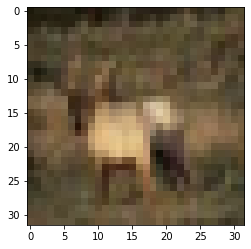

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


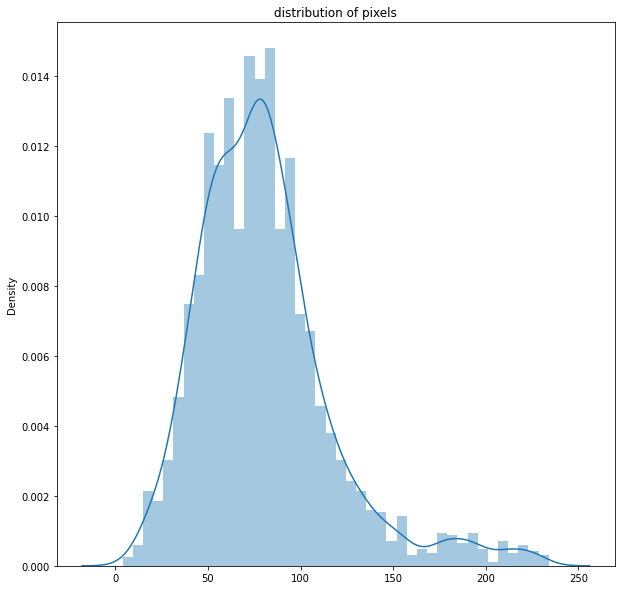

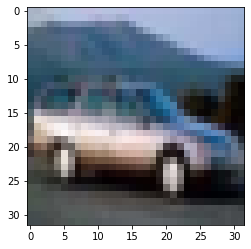

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


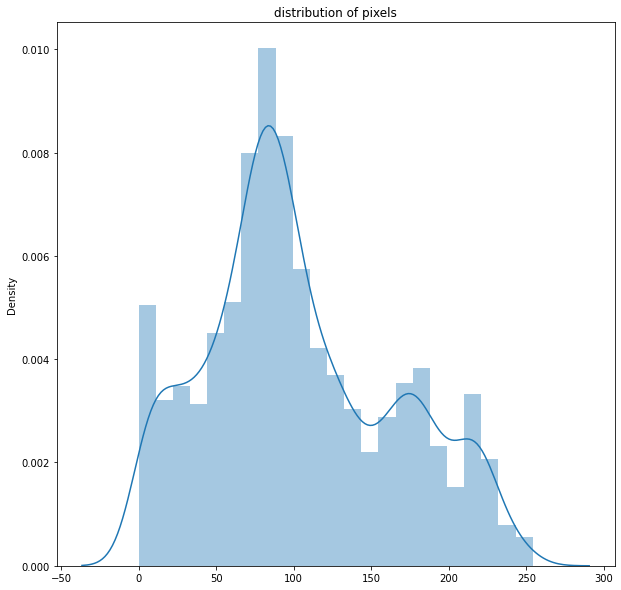

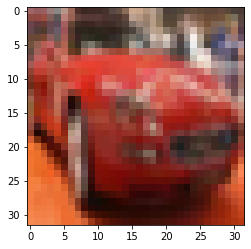

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


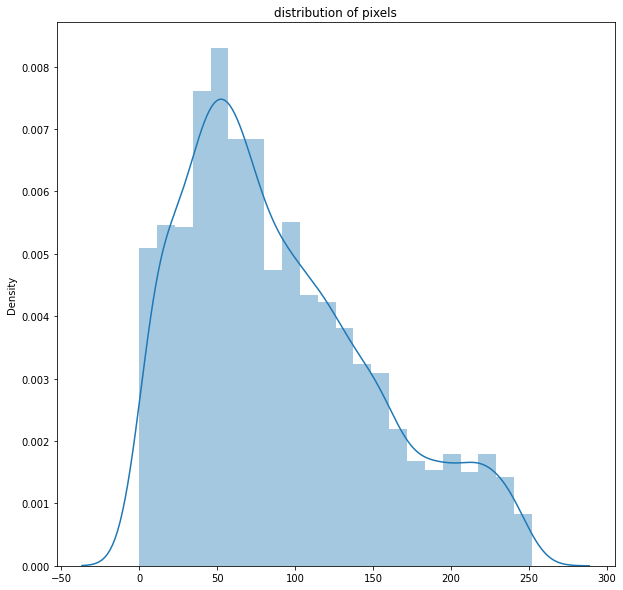

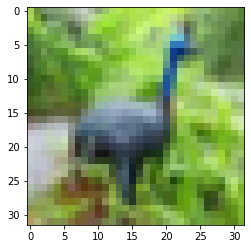

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


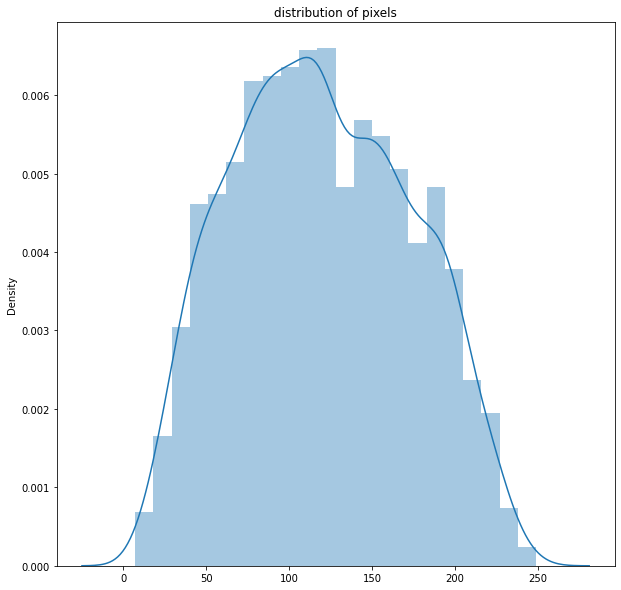

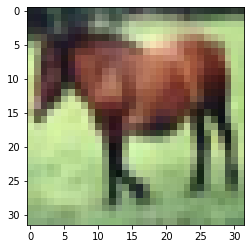

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


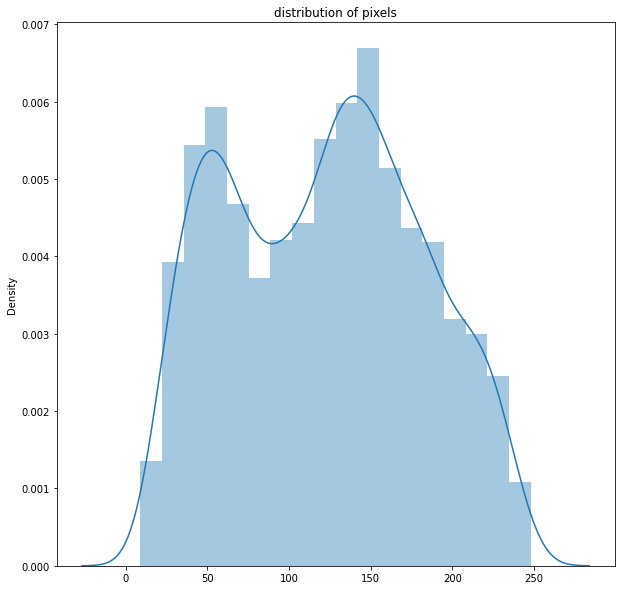

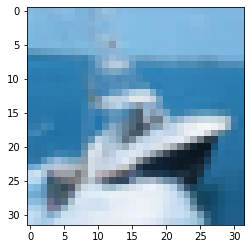

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


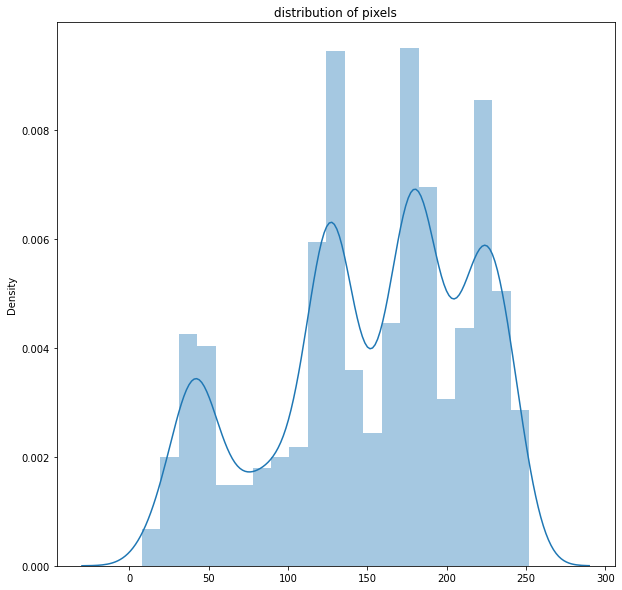

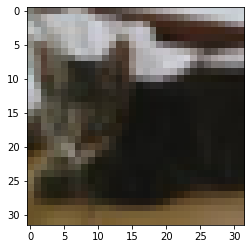

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


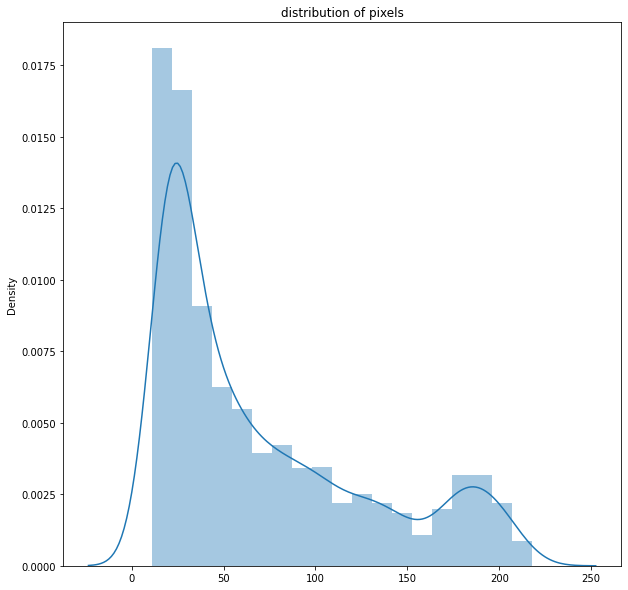

In [ ]:
show([i for i in range(10)])

In [ ]:
# plt.imshow(x_train[0][0][0:2]) # so this represents the 3 rgb values for the image and they are 32 X 32
def show_result(model,x_t,x,y,i):
  classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
  print("actual label is : ",y[i]," which is : ",classes[y[i]])
  pred = model.predict(x[i:i+1])
  print("predicted label is : ",pred , " classified as: ",classes[pred[0]])
  plt.imshow(x_t[i].reshape(32,32,3))
  plt.show()

In [ ]:
x_train[0][0][0:2]

array([[59, 62, 63],
       [43, 46, 45]], dtype=uint8)

In [ ]:
x_train = x_train.reshape(50000,3072)
x_train.shape

(50000, 3072)

In [ ]:
x_test = x_test.reshape(10000,3072)
x_test.shape

(10000, 3072)

In [ ]:
x_train = x_train[:3000]
x_test = x_test[:500]
y_train = y_train[:3000]
y_test = y_test[:500]
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3000, 3072) (500, 3072) (3000,) (500,)


In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_trn = pca.fit_transform(x_train)
x_tst = pca.transform(x_test)
y_trn = y_train
y_tst = y_test

In [ ]:
print(x_trn.shape[1],x_tst.shape[1])

199 199


In [ ]:
def give_me_roc_curve(y_test,y_pred):
  print(y_test[:10])
  label1 = label_binarize(y_test,classes = [i for i in range(10)])
  print(label1[:10])
  label2 = y_pred
  # label2 = label_binarize(y_pred,classes = [i for i in range(10)])
  fpr = dict()
  tpr = dict()
  auc_ = dict()
  for i in range(label1.shape[1]):
    fpr[i],tpr[i],_ = roc_curve(label1[:,i],label2[:,i])
    auc_[i] = auc(fpr[i],tpr[i])
  plt.figure(figsize=(10,10))
  for i in range(label1.shape[1]):
    plt.plot(fpr[i],tpr[i],label = f'class {i} - auc {auc_[i]}')
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.legend()
  plt.show()


In [ ]:
df = pd.DataFrame(columns = [f'f{i}' for i in range(x_trn.shape[1])],data = x_trn)
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198
0,-1669.275314,668.593718,421.570598,889.352366,1074.505233,171.997291,-95.569745,694.243899,480.094727,311.002202,89.756384,-32.439217,122.487597,-35.625598,133.076321,-267.576081,65.939225,6.008923,196.980994,-119.948004,-143.900548,-323.455482,-226.460508,169.712055,36.542320,246.832437,90.842184,102.346919,352.959447,385.246866,-216.093323,-188.791849,-213.222104,130.769114,-276.337363,134.013861,89.413019,-158.052832,-152.744006,-31.263475,...,66.267451,4.951498,-53.562834,119.733306,47.271659,-49.494606,44.301527,-143.033534,28.604007,-57.701251,-17.022282,-32.427331,-60.033028,-126.133972,-146.944426,18.033976,-158.511480,-19.476482,-123.862105,31.166638,-58.785992,-52.919068,-51.633190,-48.019878,-50.627973,-91.539642,-118.170017,56.699920,4.682990,6.537799,-116.678203,-90.207633,26.278835,-78.920575,64.153832,58.616221,118.084484,-6.655243,-83.873855,67.055612
1,207.626434,-221.367814,1582.556060,-366.422387,410.322326,317.838639,-101.856522,379.726711,465.089152,867.966881,-701.522668,4.580745,-233.744662,-252.284688,309.857958,409.006178,587.319188,652.104954,333.819307,-154.763622,427.982380,164.608438,-3.810044,-251.206713,106.501670,-95.688912,-97.015784,-159.330016,-307.698290,47.753756,-68.887952,-417.397317,-119.476708,-59.966404,165.011618,-239.083824,-178.562860,-53.944911,-110.212666,-42.582215,...,4.399368,-55.958990,-201.589224,71.724275,-11.400580,-45.392363,32.193223,-7.573288,-26.764237,125.191418,12.739596,-77.880836,-48.104459,51.505496,-61.728916,-194.025707,-19.931045,-5.593711,78.158912,202.344578,35.136755,120.415273,57.233069,-105.422200,267.059238,66.981979,-30.440184,33.683077,35.084596,-44.194942,11.790470,20.332758,-123.240186,110.837329,-123.210466,24.566933,-16.767479,-138.429547,113.721554,29.751363
2,2031.137022,-2827.970298,-729.346902,-581.638300,493.997692,-599.387069,-115.282725,-309.435619,188.201175,-464.474758,762.552259,-132.367215,304.768844,323.678779,-446.588831,-97.946086,-274.825990,-240.240560,-313.159803,-485.894840,-380.672718,153.404013,25.450489,37.569702,40.282041,130.659454,485.944714,98.746549,-210.154602,72.147813,79.310309,246.467476,-113.712536,466.950816,-364.953350,317.347362,126.176846,-373.560509,-243.135450,157.159584,...,-5.778825,73.848998,-51.350579,-52.643460,-44.647010,100.169890,-38.503961,-46.452066,-50.206702,17.158673,9.702994,126.834817,66.558644,-3.334106,95.184976,140.228668,-21.282140,-5.788938,-12.211190,-27.318688,-41.055697,42.817838,26.598167,86.252734,-8.856868,84.320946,42.043057,-27.433841,-53.132465,34.069591,-98.435578,-10.216364,-3.444863,-26.738992,50.960327,-18.367526,-168.720804,-41.428420,-69.022255,4.830849
3,-2650.658154,-31.844913,326.972718,365.894319,389.786734,198.202091,8.703163,340.715071,157.866197,-121.194992,134.359601,-30.071953,-435.228511,152.183139,232.565778,-27.432357,46.061788,5.147856,289.815899,-284.733002,-197.975210,-37.518818,151.623497,21.526430,-123.961523,204.060593,284.518693,-184.001389,184.889819,-102.948889,-59.774715,-108.748044,166.473434,67.032689,35.432632,-51.555700,-44.576902,91.320427,-17.833225,-53.014580,...,16.702039,22.033153,2.026512,-0.264122,-7.582225,80.588614,-14.380705,-32.383246,-49.746979,-29.459215,-36.625229,-19.992651,-9.513154,53.346101,14.864755,-10.029980,32.262652,-109.689256,14.405570,49.428776,14.073592,-32.122043,1.733338,-48.869307,-11.947186,-2.518999,30.106579,-0.709468,-19.002359,49.610623,13.829995,1.089342,-68.261890,84.486310,30.628455,-36.209868,11.719361,17.591259,-10.052079,-61.315622
4,-639.290528,-1212.326926,270.525865,-798.779371,-178.993296,528.183531,-1486.420099,850.547871,297.684079,-409.058289,-746.847619,45

In [ ]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,...,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,9.549694e-15,-2.122154e-15,8.943365e-15,1.023182e-14,-3.898511e-15,-4.926430e-16,1.449507e-14,3.610504e-14,1.338663e-14,1.197501e-14,2.993753e-15,-9.871807e-15,2.755011e-14,-2.648903e-14,5.286438e-15,-1.572668e-15,-2.162418e-14,-2.273737e-16,-4.926430e-15,3.420079e-15,6.555941e-15,-4.850638e-15,-5.343281e-15,-4.831691e-15,6.309619e-15,-3.439027e-15,6.669628e-15,6.063298e-16,-1.350979e-14,-2.311632e-15,-2.624271e-15,-8.299139e-15,1.515825e-14,-9.696540e-15,-5.731711e-15,7.330433e-15,7.010688e-15,1.315451e-14,-1.677355e-14,-2.794801e-15,...,7.285432e-15,-1.155816e-15,3.357907e-15,-2.854605e-15,-1.548983e-15,-1.430559e-15,2.692957e-15,-6.824171e-16,1.155816e-15,-5.133671e-15,-6.428043e-15,-4.084436e-15,-2.707168e-15,7.114901e-15,-6.679102e-16,6.333304e-15,3.087308e-15,2.214525e-15,-7.097138e-15,-2.155313e-15,1.280398e-14,-2.238210e-15,6.496729e-15,5.241437e-15,-5.385914e-15,9.237056e-16,7.318590e-16,6.082246e-15,1.222134e-15,2.720046e-16,-2.591113e-15,6.458241e-15,-2.655061e-15,1.339373e-15,-1.133079e-14,5.055512e-15,-4.869586e-15,9.331795e-16,4.109305e-15,7.323327e-15
std,1.874784e+03,1.171628e+03,9.044130e+02,6.816434e+02,6.521420e+02,5.897637e+02,5.686969e+02,5.177720e+02,5.147323e+02,4.202719e+02,4.063599e+02,3.621708e+02,3.595690e+02,3.538476e+02,3.305384e+02,3.237663e+02,3.084780e+02,2.979945e+02,2.910099e+02,2.879566e+02,2.773965e+02,2.686446e+02,2.543356e+02,2.517106e+02,2.446358e+02,2.431886e+02,2.420829e+02,2.371186e+02,2.239990e+02,2.212894e+02,2.105097e+02,2.085267e+02,2.006885e+02,1.991122e+02,1.935405e+02,1.920278e+02,1.810858e+02,1.794898e+02,1.789385e+02,1.745793e+02,...,6.925674e+01,6.912961e+01,6.851821e+01,6.831420e+01,6.813455e+01,6.751912e+01,6.697213e+01,6.686290e+01,6.648810e+01,6.621585e+01,6.590353e+01,6.567565e+01,6.549245e+01,6.524083e+01,6.492744e+01,6.476843e+01,6.453010e+01,6.414744e+01,6.383202e+01,6.342975e+01,6.335609e+01,6.311195e+01,6.289791e+01,6.236177e+01,6.224075e+01,6.207088e+01,6.196245e+01,6.150953e+01,6.149180e+01,6.080112e+01,6.062247e+01,6.027952e+01,6.021405e+01,6.014135e+01,5.996970e+01,5.977102e+01,5.945158e+01,5.941012e+01,5.934353e+01,5.887478e+01
min,-5.457608e+03,-3.541001e+03,-3.062831e+03,-2.817463e+03,-2.506880e+03,-2.171321e+03,-2.497707e+03,-2.022277e+03,-1.989209e+03,-1.556263e+03,-1.673403e+03,-1.478353e+03,-1.350382e+03,-1.661829e+03,-1.463559e+03,-1.588219e+03,-1.926362e+03,-1.101276e+03,-1.107046e+03,-1.184442e+03,-1.220297e+03,-1.171702e+03,-1.053043e+03,-1.050723e+03,-1.189576e+03,-1.011766e+03,-1.042987e+03,-1.250847e+03,-1.024133e+03,-8.312075e+02,-7.556203e+02,-9.525985e+02,-8.6847

CAUTION - DON'T RUN IT (IT WILL TAKE A LOT OF TIME)
 

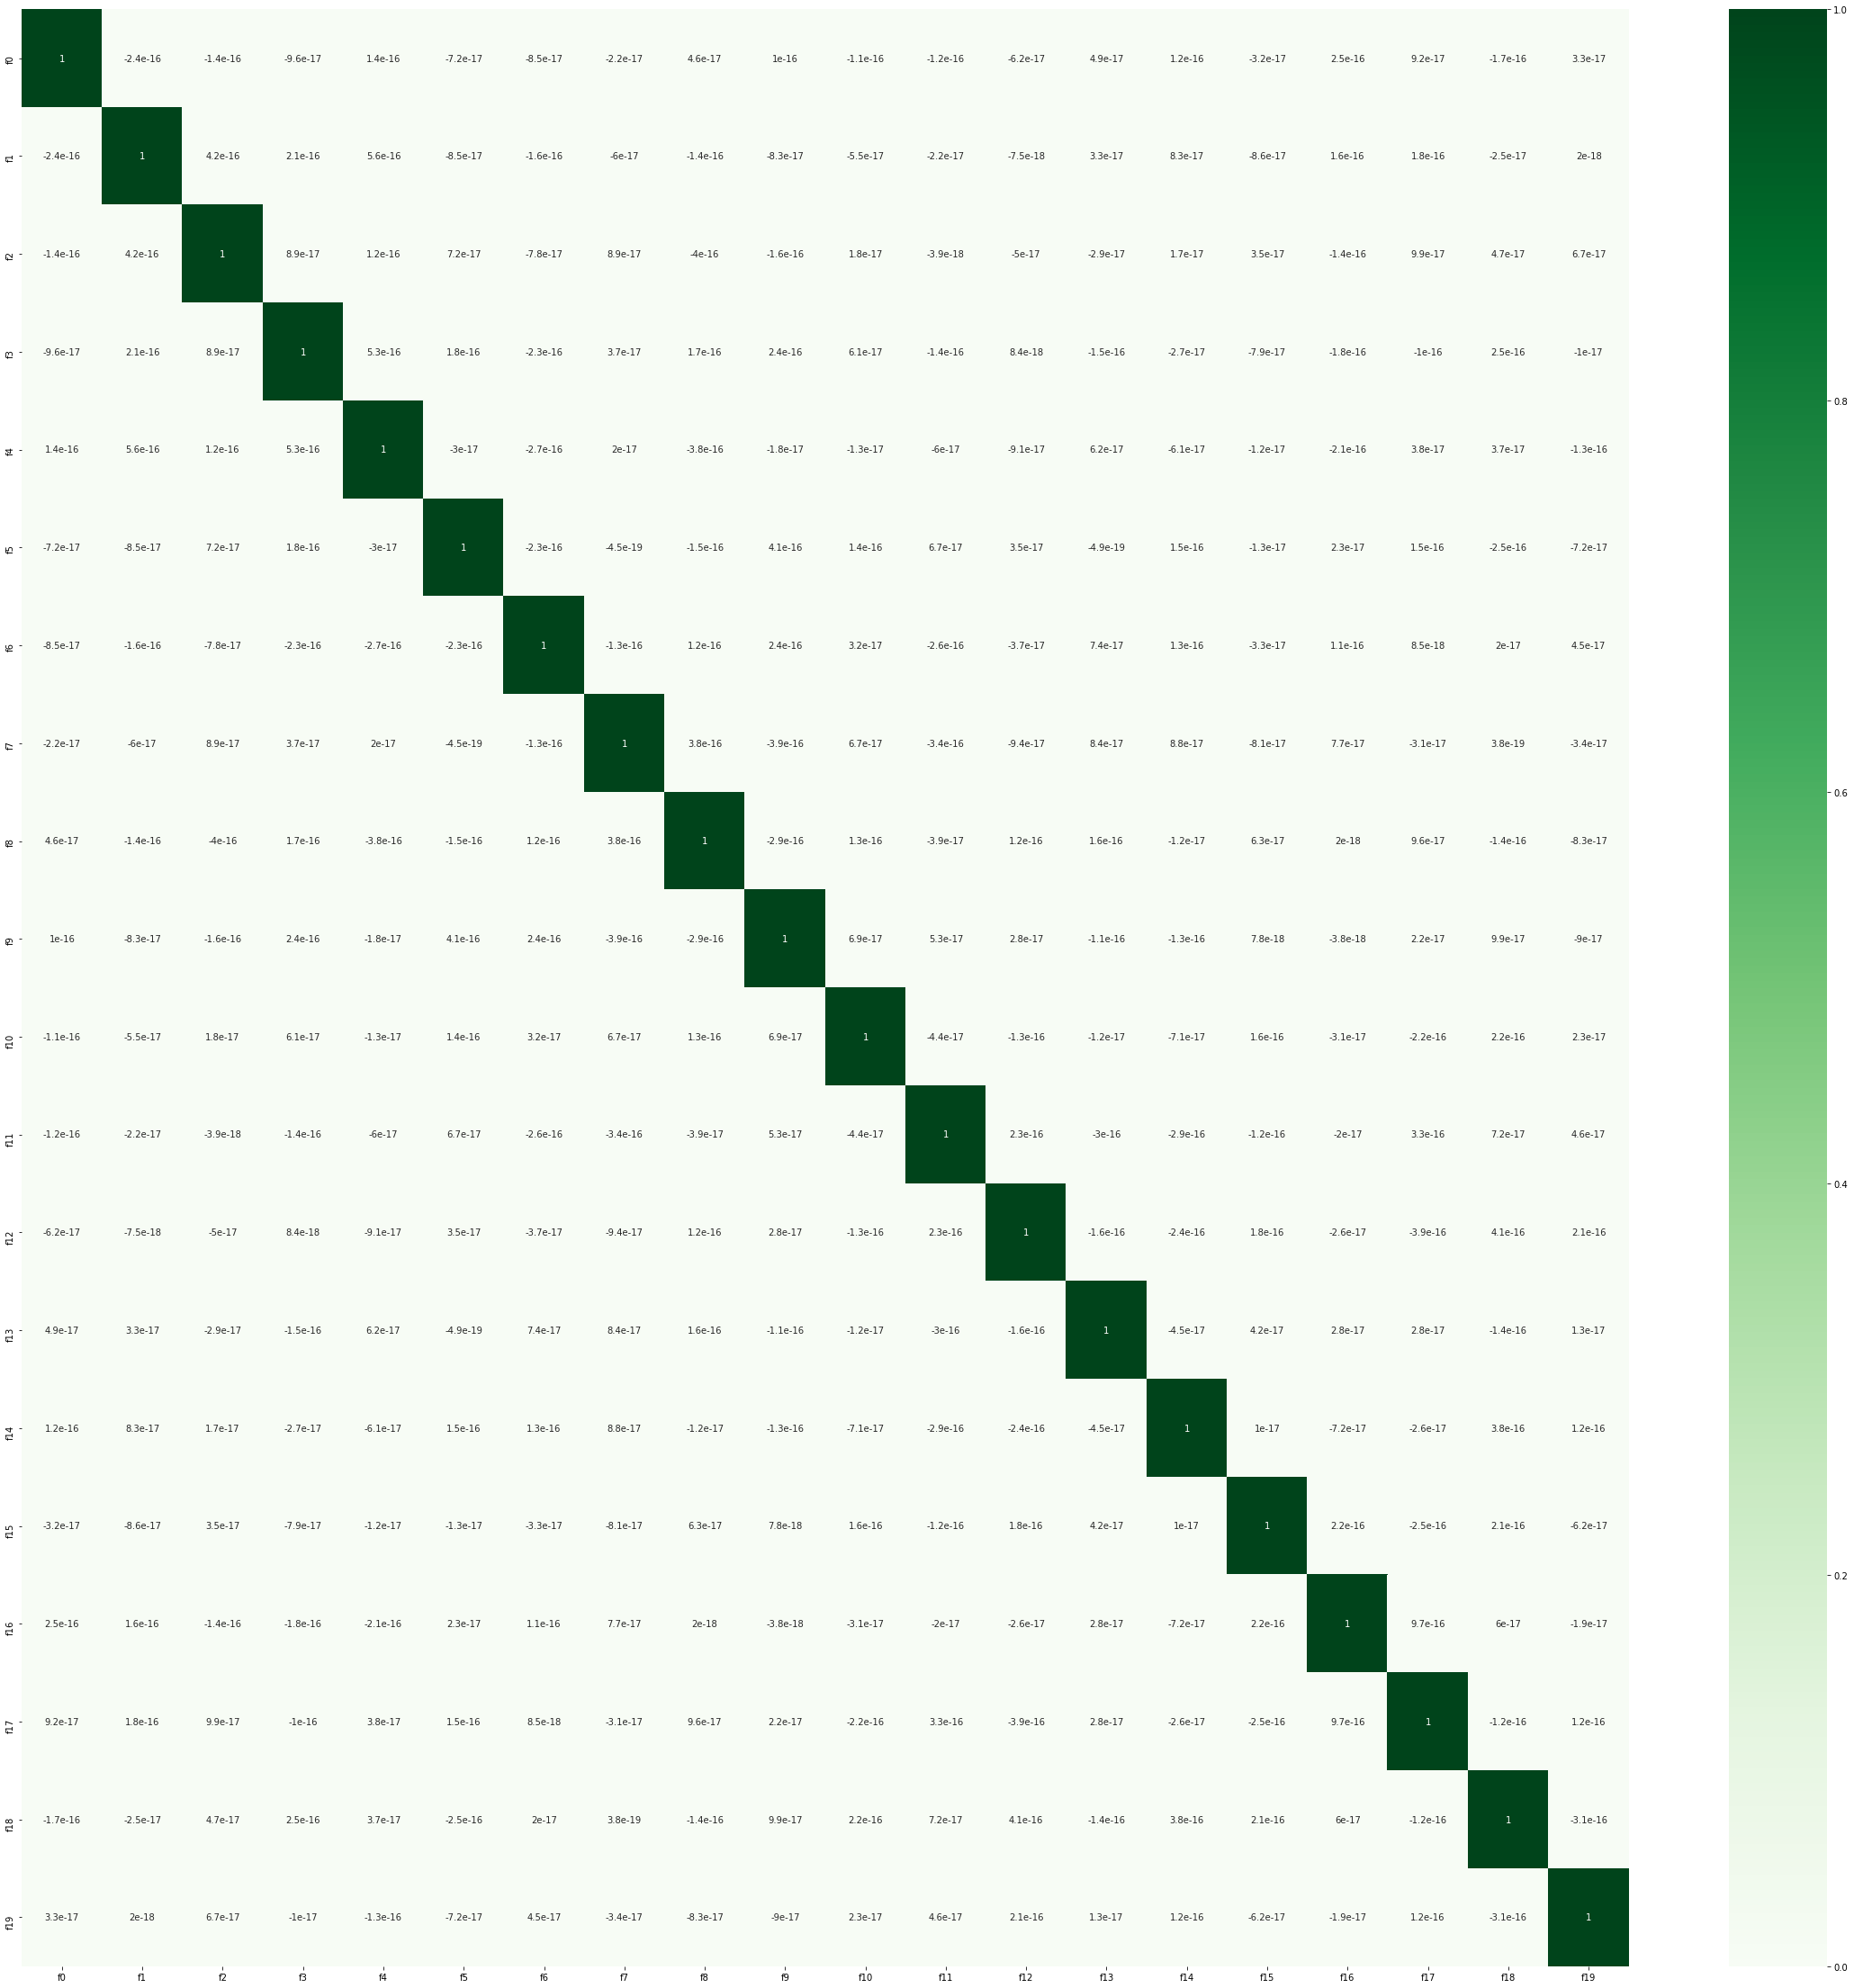

In [ ]:
df1 = pd.DataFrame(columns = [f'f{i}' for i in range(20)],data = x_trn[:,:20])
df1.head()
plt.figure(figsize=(40,40))
sns.heatmap(data = df1.corr(),cmap = 'Greens',annot=True)

In [ ]:
from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split

In [ ]:
# x_trn,x_tst,y_trn,y_tst = train_test_split(feat,y_train,test_size=10000,random_state = 0)

In [ ]:
clf = SVC(C=3,probability=True)
clf.fit(x_trn,y_trn)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

actual label is :  3  which is :  cat
predicted label is :  [3]  classified as:  cat


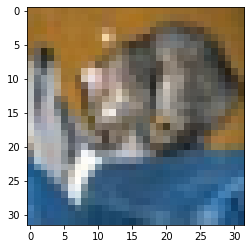

actual label is :  8  which is :  ship
predicted label is :  [8]  classified as:  ship


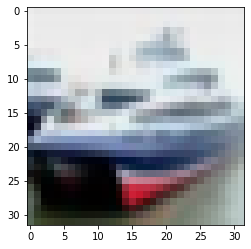

actual label is :  8  which is :  ship
predicted label is :  [0]  classified as:  airplane


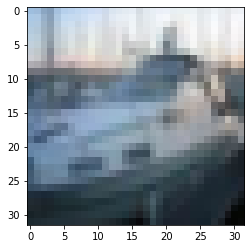

actual label is :  0  which is :  airplane
predicted label is :  [0]  classified as:  airplane


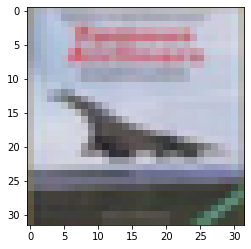

actual label is :  6  which is :  frog
predicted label is :  [4]  classified as:  deer


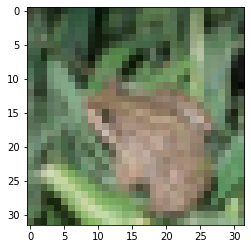

actual label is :  6  which is :  frog
predicted label is :  [6]  classified as:  frog


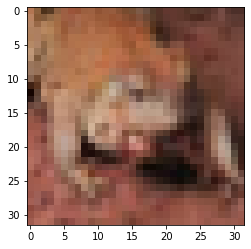

actual label is :  1  which is :  automobile
predicted label is :  [1]  classified as:  automobile


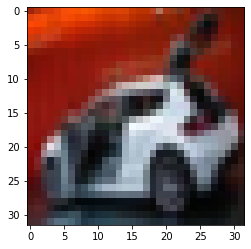

actual label is :  6  which is :  frog
predicted label is :  [4]  classified as:  deer


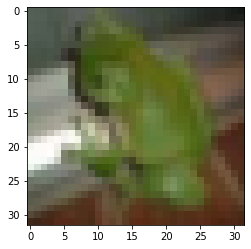

actual label is :  3  which is :  cat
predicted label is :  [3]  classified as:  cat


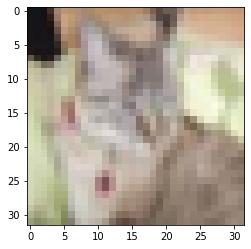

actual label is :  1  which is :  automobile
predicted label is :  [1]  classified as:  automobile


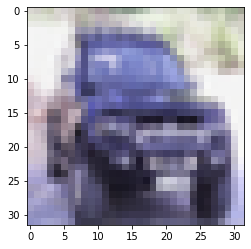

In [ ]:
for i in range(10):
  show_result(clf,x_test,x_tst,y_tst,i)

In [ ]:
from sklearn.metrics import precision_score,precision_recall_curve,confusion_matrix,recall_score,precision_recall_fscore_support
prediction= clf.predict(x_tst)
print(confusion_matrix(y_tst,prediction))
print(precision_score(y_tst,prediction,average='micro'))
print(recall_score(y_tst,prediction,average='micro'))
print(precision_recall_fscore_support(y_tst,prediction))

[[26  2  3  2  3  1  2  4 10  4]
 [ 2 18  1  3  1  0  0  2  5  9]
 [ 6  2 18  5  4  8  6  2  0  0]
 [ 1  3  8  8  3 14  7  1  2  2]
 [ 4  1 11  2  5  2  9  3  0  3]
 [ 1  2  5 11  5 15  5  2  2  0]
 [ 0  2  5  5  9  1 28  2  1  1]
 [ 3  2  4  2  5  5  6 15  1  4]
 [11  2  0  1  1  2  0  1 34  5]
 [ 4  6  1  3  0  0  0  6 10 26]]
0.386
0.386
(array([0.44827586, 0.45      , 0.32142857, 0.19047619, 0.13888889,
       0.3125    , 0.44444444, 0.39473684, 0.52307692, 0.48148148]), array([0.45614035, 0.43902439, 0.35294118, 0.16326531, 0.125     ,
       0.3125    , 0.51851852, 0.31914894, 0.59649123, 0.46428571]), array([0.45217391, 0.44444444, 0.3364486 , 0.17582418, 0.13157895,
       0.3125    , 0.47863248, 0.35294118, 0.55737705, 0.47272727]), array([57, 41, 51, 49, 40, 48, 54, 47, 57, 56]))


[3 8 8 0 6 6 1 6 3 1]
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


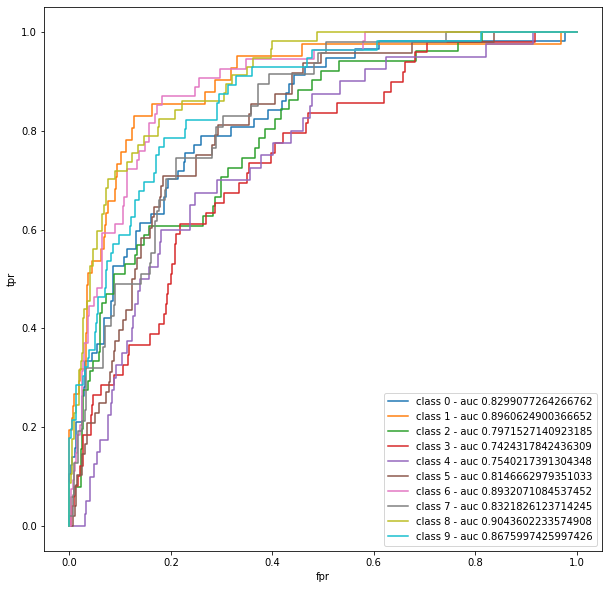

In [ ]:
from sklearn.metrics import accuracy_score
a = clf.predict_proba(x_tst)
# print('accuracy score ',accuracy_score(a,y_tst))
give_me_roc_curve(y_tst,a)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf1  = MLPClassifier()
clf1.fit(x_trn,y_trn)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

actual label is :  3  which is :  cat
predicted label is :  [1]  classified as:  automobile


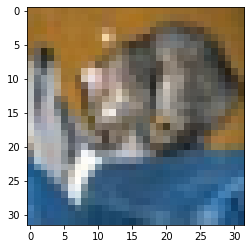

actual label is :  8  which is :  ship
predicted label is :  [8]  classified as:  ship


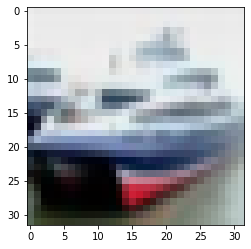

actual label is :  8  which is :  ship
predicted label is :  [0]  classified as:  airplane


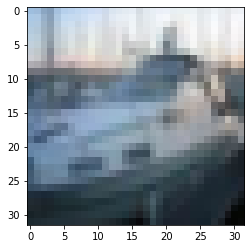

actual label is :  0  which is :  airplane
predicted label is :  [0]  classified as:  airplane


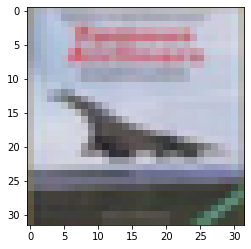

actual label is :  6  which is :  frog
predicted label is :  [4]  classified as:  deer


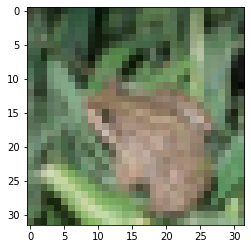

actual label is :  6  which is :  frog
predicted label is :  [4]  classified as:  deer


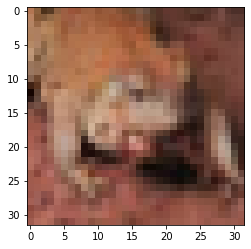

actual label is :  1  which is :  automobile
predicted label is :  [1]  classified as:  automobile


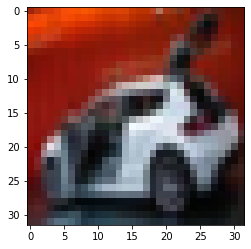

actual label is :  6  which is :  frog
predicted label is :  [6]  classified as:  frog


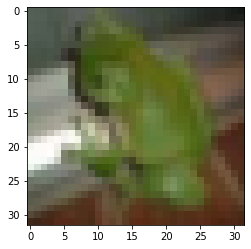

actual label is :  3  which is :  cat
predicted label is :  [3]  classified as:  cat


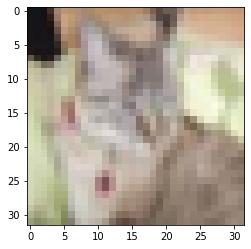

actual label is :  1  which is :  automobile
predicted label is :  [9]  classified as:  truck


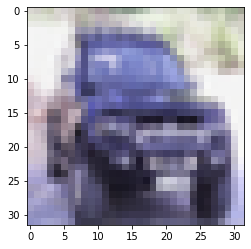

In [ ]:
for i in range(10):
  show_result(clf1,x_test,x_tst,y_tst,i)

accuracy score  0.4135


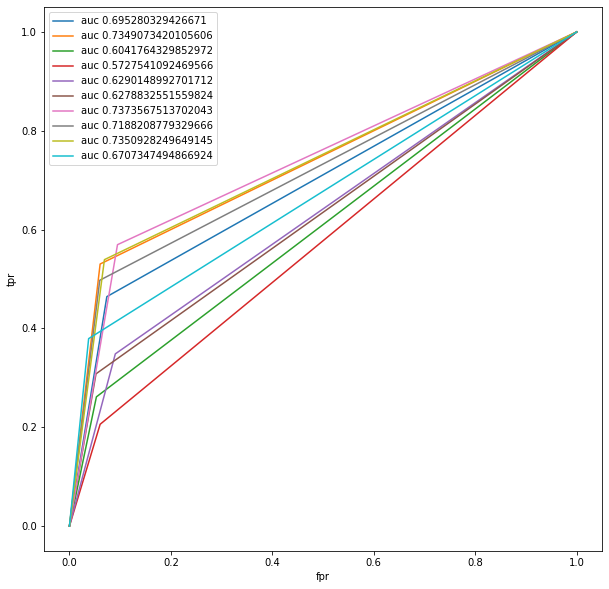

In [ ]:
a = clf1.predict(x_tst)
print('accuracy score ',accuracy_score(a,y_tst))
give_me_roc_curve(y_tst,a)

accuracy score  0.27
[3 8 8 0 6 6 1 6 3 1]
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


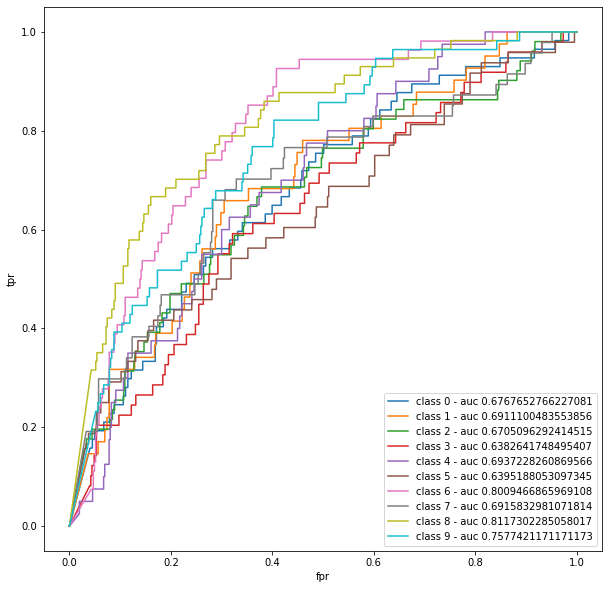

In [ ]:
a = clf1.predict_proba(x_tst)
b = clf1.predict(x_tst)
print('accuracy score ',accuracy_score(b,y_tst))
give_me_roc_curve(y_tst,a)

In [ ]:
# crossvalidation 
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(estimator = SVC(C=4),X= x_trn,y = y_trn,cv=10)



In [ ]:
cv_score

array([0.526 , 0.5185, 0.526 , 0.5075, 0.5225, 0.5095, 0.499 , 0.508 ,
       0.509 , 0.508 ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


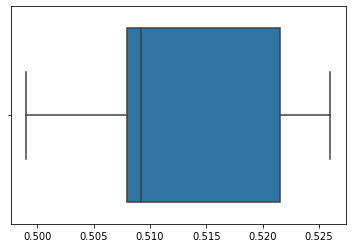

In [ ]:
sns.boxplot(cv_score)

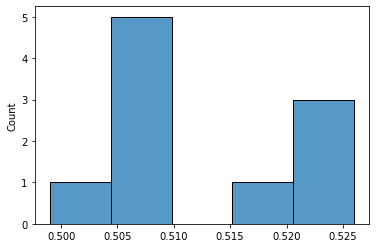

In [ ]:
sns.histplot(cv_score)

In [ ]:
estimators ={i:SVC(C=i) for i in range(2,11)} #{'2':SVC(C=2),'3':SVC(C=3)}
estimators

{2: SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 3: SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 4: SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 5: SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol

In [ ]:
accuracy_list = []
for C,model in estimators.items():
  model.fit(x_trn,y_trn)
  a = model.predict(x_tst)
  accuracy_list.append(accuracy_score(a,y_tst))


Text(0, 0.5, 'accuracy')

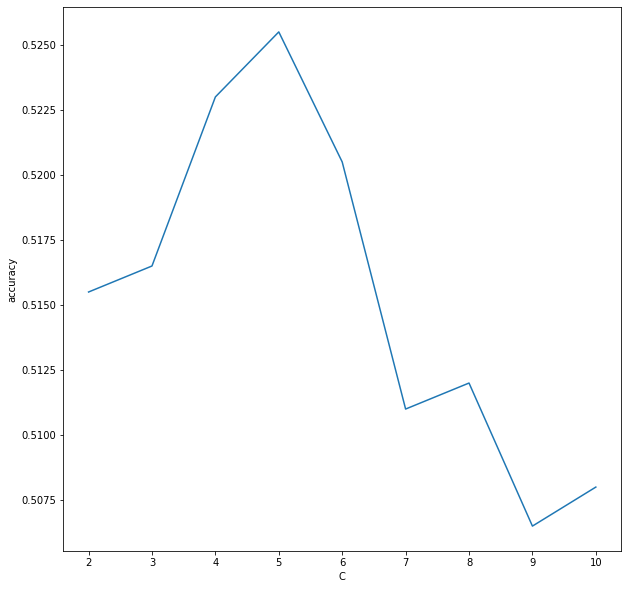

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(list(estimators.keys()),accuracy_list)
plt.xlabel('C')
plt.ylabel('accuracy')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
cv_score1 = cross_val_score(estimator = MLPClassifier(),X= x_trn,y = y_trn,cv=5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


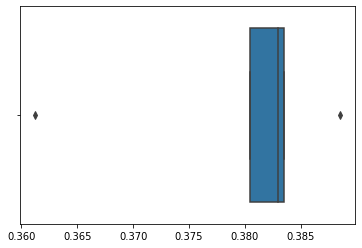

In [ ]:
sns.boxplot(cv_score1)

In [ ]:
cv_score1

array([0.3835 , 0.36125, 0.3885 , 0.383  , 0.3805 ])

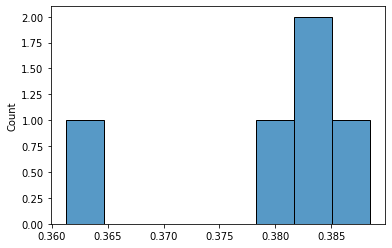

In [ ]:
sns.histplot(cv_score1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf2=KNeighborsClassifier(n_neighbors=25)
clf2.fit(x_trn,y_trn)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

actual label is :  3  which is :  cat
predicted label is :  [4]  classified as:  deer


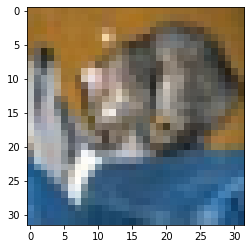

actual label is :  8  which is :  ship
predicted label is :  [8]  classified as:  ship


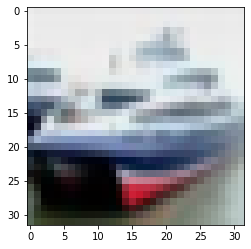

actual label is :  8  which is :  ship
predicted label is :  [8]  classified as:  ship


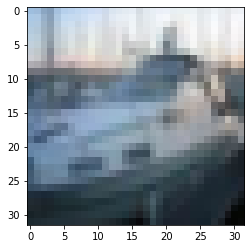

actual label is :  0  which is :  airplane
predicted label is :  [8]  classified as:  ship


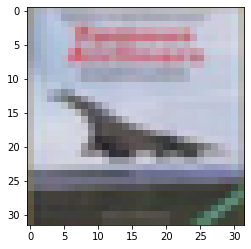

actual label is :  6  which is :  frog
predicted label is :  [4]  classified as:  deer


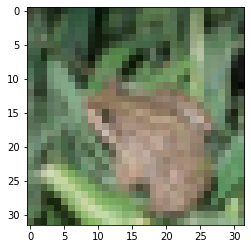

actual label is :  6  which is :  frog
predicted label is :  [6]  classified as:  frog


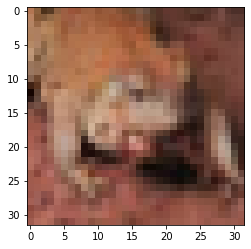

actual label is :  1  which is :  automobile
predicted label is :  [6]  classified as:  frog


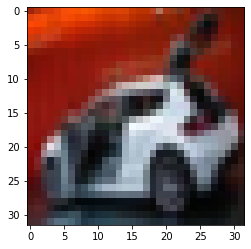

actual label is :  6  which is :  frog
predicted label is :  [4]  classified as:  deer


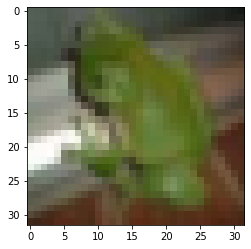

actual label is :  3  which is :  cat
predicted label is :  [2]  classified as:  bird


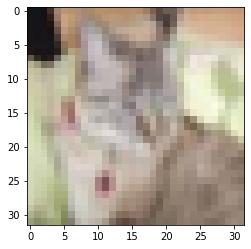

actual label is :  1  which is :  automobile
predicted label is :  [8]  classified as:  ship


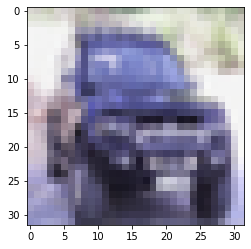

In [ ]:
for i in range(10):
  show_result(clf2,x_test,x_tst,y_tst,i)

accuracy score  0.327


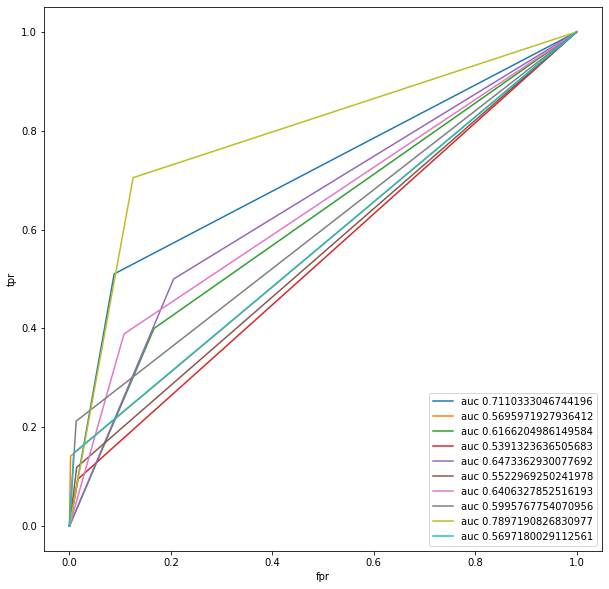

In [ ]:
a = clf2.predict(x_tst)
print('accuracy score ',accuracy_score(a,y_tst))
give_me_roc_curve(y_tst,a)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(estimator = KNeighborsClassifier(n_neighbors=25),X= x_trn,y = y_trn,cv=10)

[0.316  0.33   0.321  0.316  0.3225 0.3275 0.3205 0.3185 0.3055 0.3035]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


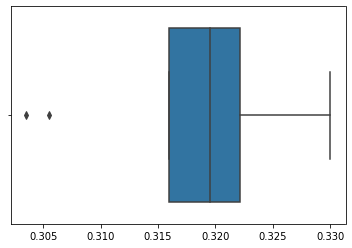

In [ ]:
print(cv_score)
sns.boxplot(cv_score)

In [ ]:
print(np.mean(cv_score))
estimators ={i:KNeighborsClassifier(n_neighbors=i) for i in range(5,30,5)}
estimators

0.3181


{5: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 10: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                      weights='uniform'),
 15: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                      weights='uniform'),
 20: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                      weights='uniform'),
 25: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                      weights='uniform')}

In [ ]:
accuracy_list = []
for C,model in estimators.items():
  model.fit(x_trn,y_trn)
  accuracy_list.append(model.score(x_tst,y_tst))
 

Text(0, 0.5, 'accuracy')

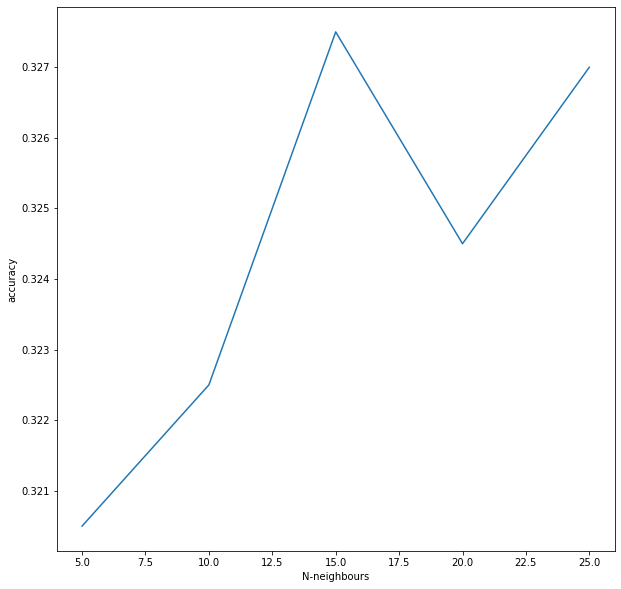

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(list(estimators.keys()),accuracy_list)
plt.xlabel('N-neighbours')
plt.ylabel('accuracy')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model= RandomForestClassifier(n_estimators=175)
model.fit(x_trn,y_trn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

actual label is :  3  which is :  cat
predicted label is :  [6]  classified as:  frog


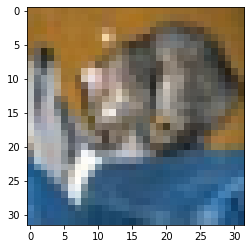

actual label is :  8  which is :  ship
predicted label is :  [9]  classified as:  truck


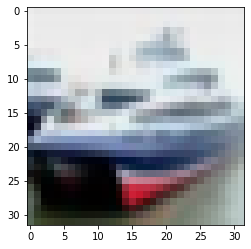

actual label is :  8  which is :  ship
predicted label is :  [8]  classified as:  ship


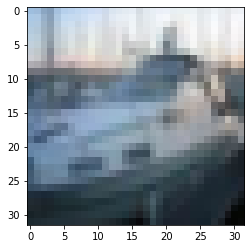

actual label is :  0  which is :  airplane
predicted label is :  [0]  classified as:  airplane


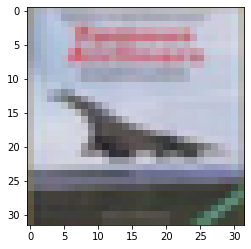

actual label is :  6  which is :  frog
predicted label is :  [2]  classified as:  bird


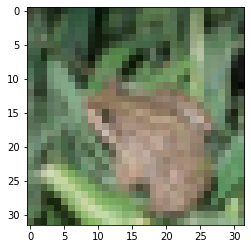

actual label is :  6  which is :  frog
predicted label is :  [6]  classified as:  frog


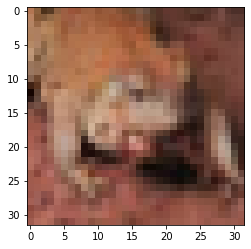

actual label is :  1  which is :  automobile
predicted label is :  [1]  classified as:  automobile


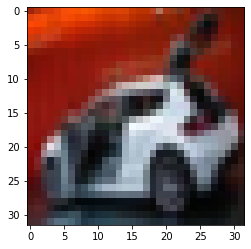

actual label is :  6  which is :  frog
predicted label is :  [6]  classified as:  frog


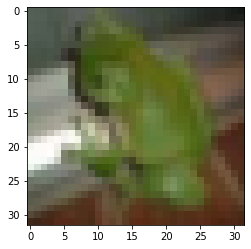

actual label is :  3  which is :  cat
predicted label is :  [5]  classified as:  dog


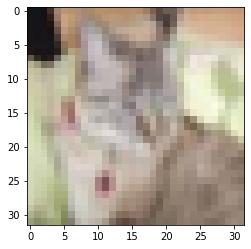

actual label is :  1  which is :  automobile
predicted label is :  [9]  classified as:  truck


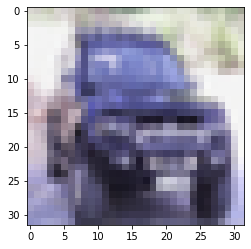

In [ ]:
for i in range(10):
  show_result(model,x_test,x_tst,y_tst,i)

accuracy score  0.432


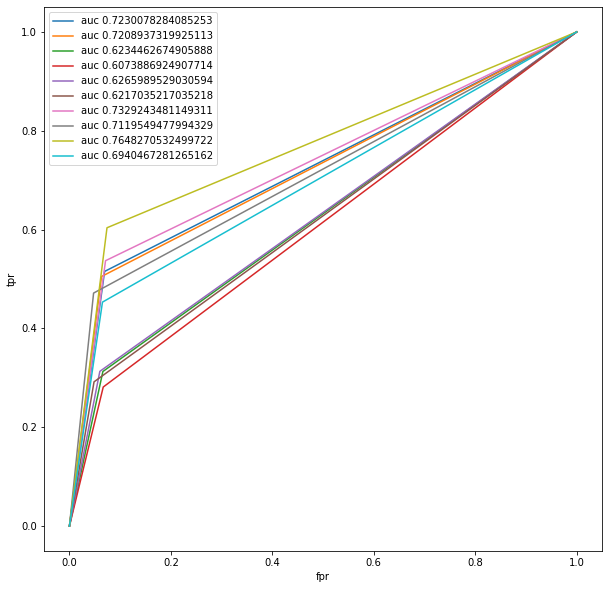

In [ ]:
from sklearn.metrics import accuracy_score
a = model.predict_proba(x_tst)
# print('accuracy score ',accuracy_score(a,y_tst))
give_me_roc_curve(y_tst,a)

[3 8 8 0 6 6 1 6 3 1]
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


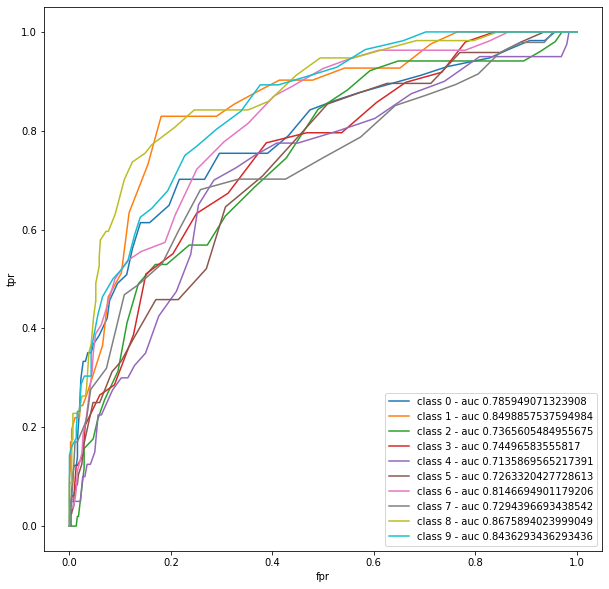

In [ ]:
from sklearn.metrics import accuracy_score
a = model.predict_proba(x_tst)
# print('accuracy score ',accuracy_score(a,y_tst))
give_me_roc_curve(y_tst,a)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(estimator = RandomForestClassifier(n_estimators=175),X= x_trn,y = y_trn,cv=10)

[0.438  0.4235 0.4305 0.444  0.424  0.425  0.419  0.423  0.4275 0.406 ]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


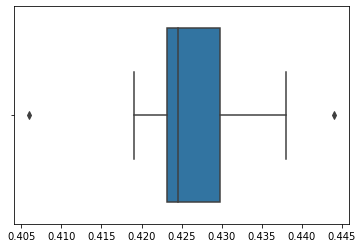

In [ ]:
print(cv_score)
sns.boxplot(cv_score)

In [ ]:
esti = {i:RandomForestClassifier(n_estimators = i) for i in range(100,300,20)}
esti

{100: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 120: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=120,
     

In [ ]:
l = []
for i,estimator in esti.items():
  estimator.fit(x_trn,y_trn)
  a = estimator.predict(x_tst)
  l.append(accuracy_score(a,y_tst))


Text(0, 0.5, 'accuracy')

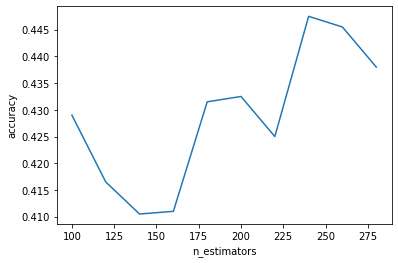

In [ ]:
sns.lineplot(x=list(esti.keys()),y=l)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')

3
